In [1]:
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt


dataFrame = pd.read_csv("data.csv", names=("sex", "length", "diameter", "height", "whole weight", 
                        "shucked weight", "viscera weight", "shell weight", "rings"))

sex = dataFrame["sex"]
mNumber = 0
fNumber = 0
iNumber = 0
totalRows = sex.count()
for s in sex:
    if s == "M":
        mNumber += 1
    elif s == "F":
        fNumber += 1
    elif s == "I":
        iNumber += 1

mPercent = round(mNumber / totalRows * 100, 2) 
iPercent = round(iNumber / totalRows * 100, 2) 
fPercent = round(fNumber / totalRows * 100, 2) 

distributionData = {
    "Count": [mNumber, iNumber, fNumber] ,
    "%": [mPercent, iPercent, fPercent]

}

distDf = pd.DataFrame(distributionData, index=["Male", "Infant", "Female"])
display(distDf)

Count      %
Male     1528  36.58
Infant   1342  32.13
Female   1307  31.29

In [2]:
columns = dataFrame.columns[1:9]

summaryIndexes = ["mean", "std", "min", "25%", "50%", "75%", "max"]

summaryStatistics =  {index: [] for index in summaryIndexes}

for columnNumber in range(0, len(columns)):
    currColumn = dataFrame[columns[columnNumber]]
    summaryStatistics["mean"].append(currColumn.mean())
    summaryStatistics["std"].append(currColumn.std())
    summaryStatistics["min"].append(currColumn.min())
    summaryStatistics["25%"].append(currColumn.quantile(0.25))
    summaryStatistics["50%"].append(currColumn.quantile(0.5))
    summaryStatistics["75%"].append(currColumn.quantile(0.75))
    summaryStatistics["max"].append(currColumn.max())

summaryDf = pd.DataFrame(summaryStatistics, index=columns)
display(summaryDf)




mean       std     min     25%     50%     75%      max
length          0.523992  0.120093  0.0750  0.4500  0.5450   0.615   0.8150
diameter        0.407881  0.099240  0.0550  0.3500  0.4250   0.480   0.6500
height          0.139516  0.041827  0.0000  0.1150  0.1400   0.165   1.1300
whole weight    0.828742  0.490389  0.0020  0.4415  0.7995   1.153   2.8255
shucked weight  0.359367  0.221963  0.0010  0.1860  0.3360   0.502   1.4880
viscera weight  0.180594  0.109614  0.0005  0.0935  0.1710   0.253   0.7600
shell weight    0.238831  0.139203  0.0015  0.1300  0.2340   0.329   1.0050
rings           9.933684  3.224169  1.0000  8.0000  9.0000  11.000  29.0000

<Axes: title={'center': 'Occurrences of each category for the qualitative variable'}, xlabel='sex', ylabel='count'>

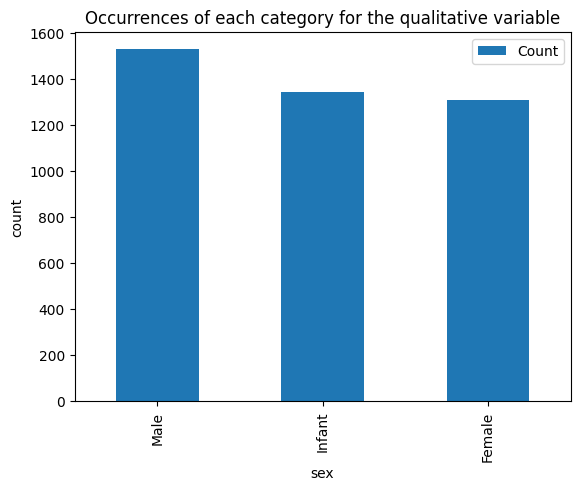

In [3]:
distChart = distDf.plot.bar(y="Count", title="Occurrences of each category for the qualitative variable", 
                            ylabel="count", xlabel="sex")
display(distChart)

array([[<Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'diameter'}>],
       [<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'whole weight'}>],
       [<Axes: title={'center': 'shucked weight'}>,
        <Axes: title={'center': 'viscera weight'}>],
       [<Axes: title={'center': 'shell weight'}>,
        <Axes: title={'center': 'rings'}>]], dtype=object)

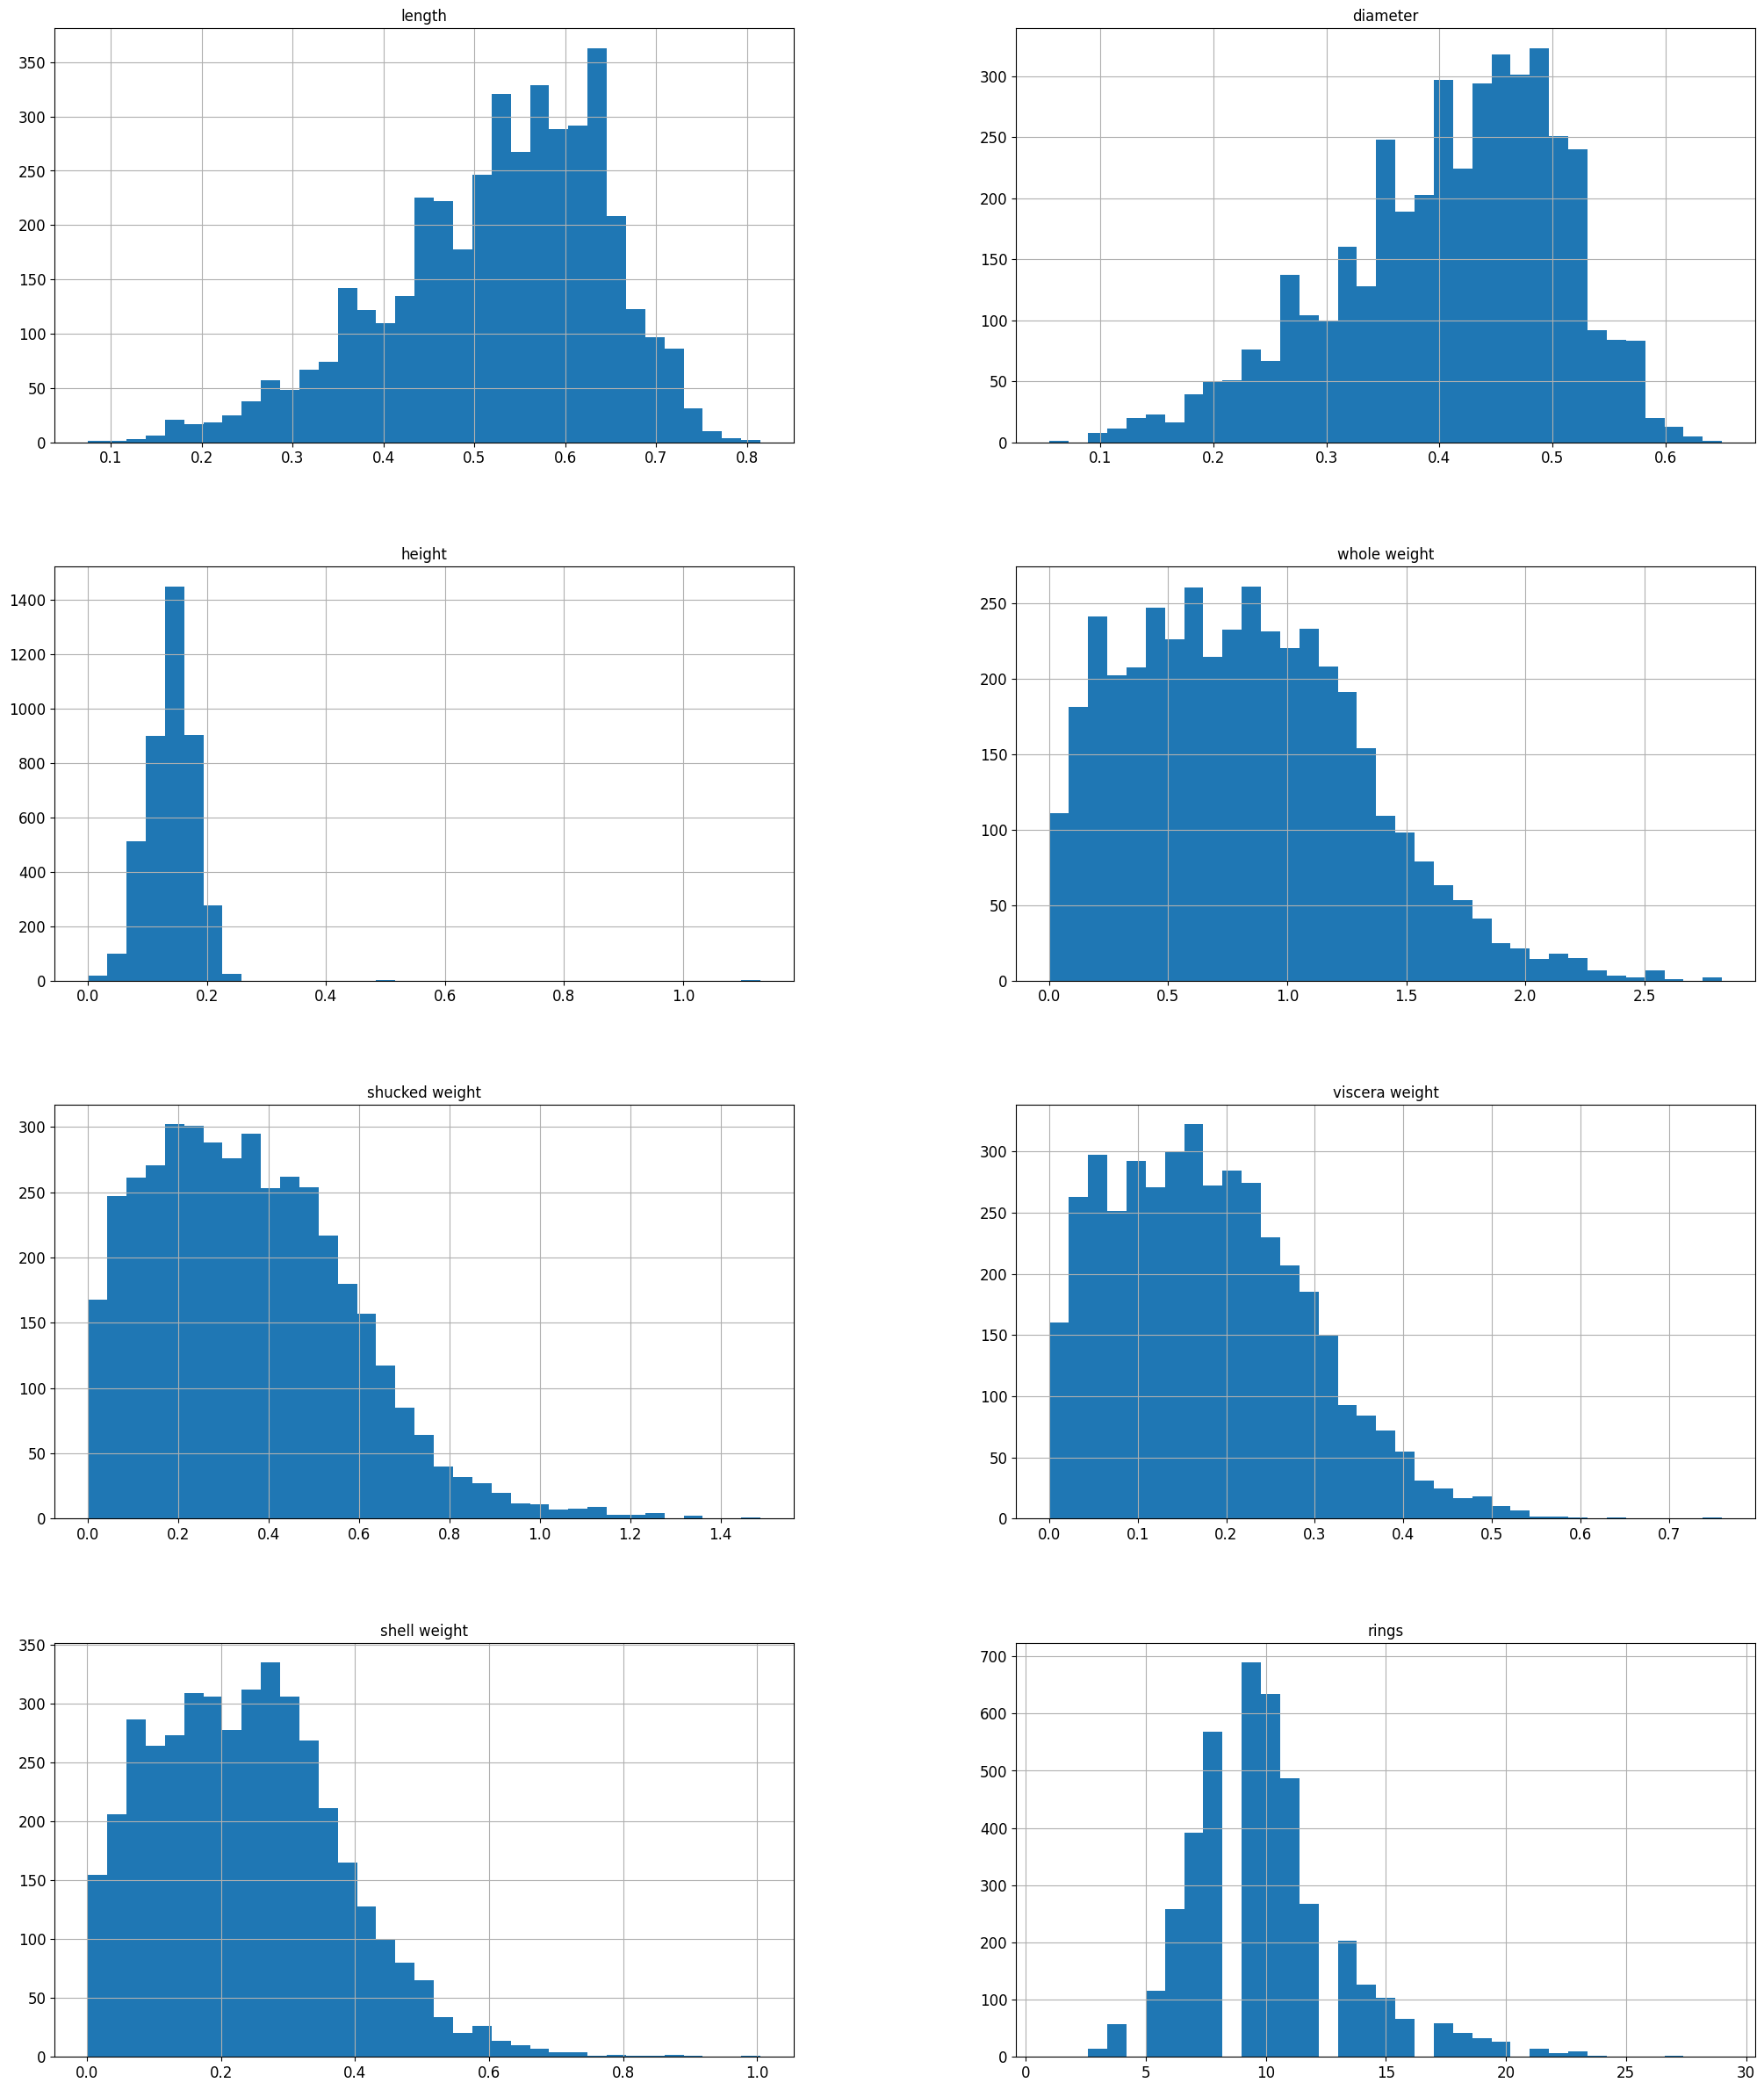

In [4]:


dfHist = dataFrame.hist(layout=(4, 2), figsize=(25, 30), xlabelsize=12, ylabelsize=12, bins=35)
display(dfHist)

Column number: diameter
Start column: length

Column number: height
Start column: length

Column number: whole weight
Start column: length

Column number: shucked weight
Start column: length

Column number: viscera weight
Start column: length

Column number: shell weight
Start column: length

Column number: rings
Start column: length

Column number: height
Start column: diameter

Column number: whole weight
Start column: diameter

Column number: shucked weight
Start column: diameter

Column number: viscera weight
Start column: diameter

Column number: shell weight
Start column: diameter

Column number: rings
Start column: diameter

Column number: whole weight
Start column: height

Column number: shucked weight
Start column: height

Column number: viscera weight
Start column: height

Column number: shell weight
Start column: height

Column number: rings
Start column: height

Column number: shucked weight
Start column: whole weight

Column number: viscera weight
Start column: whole weigh

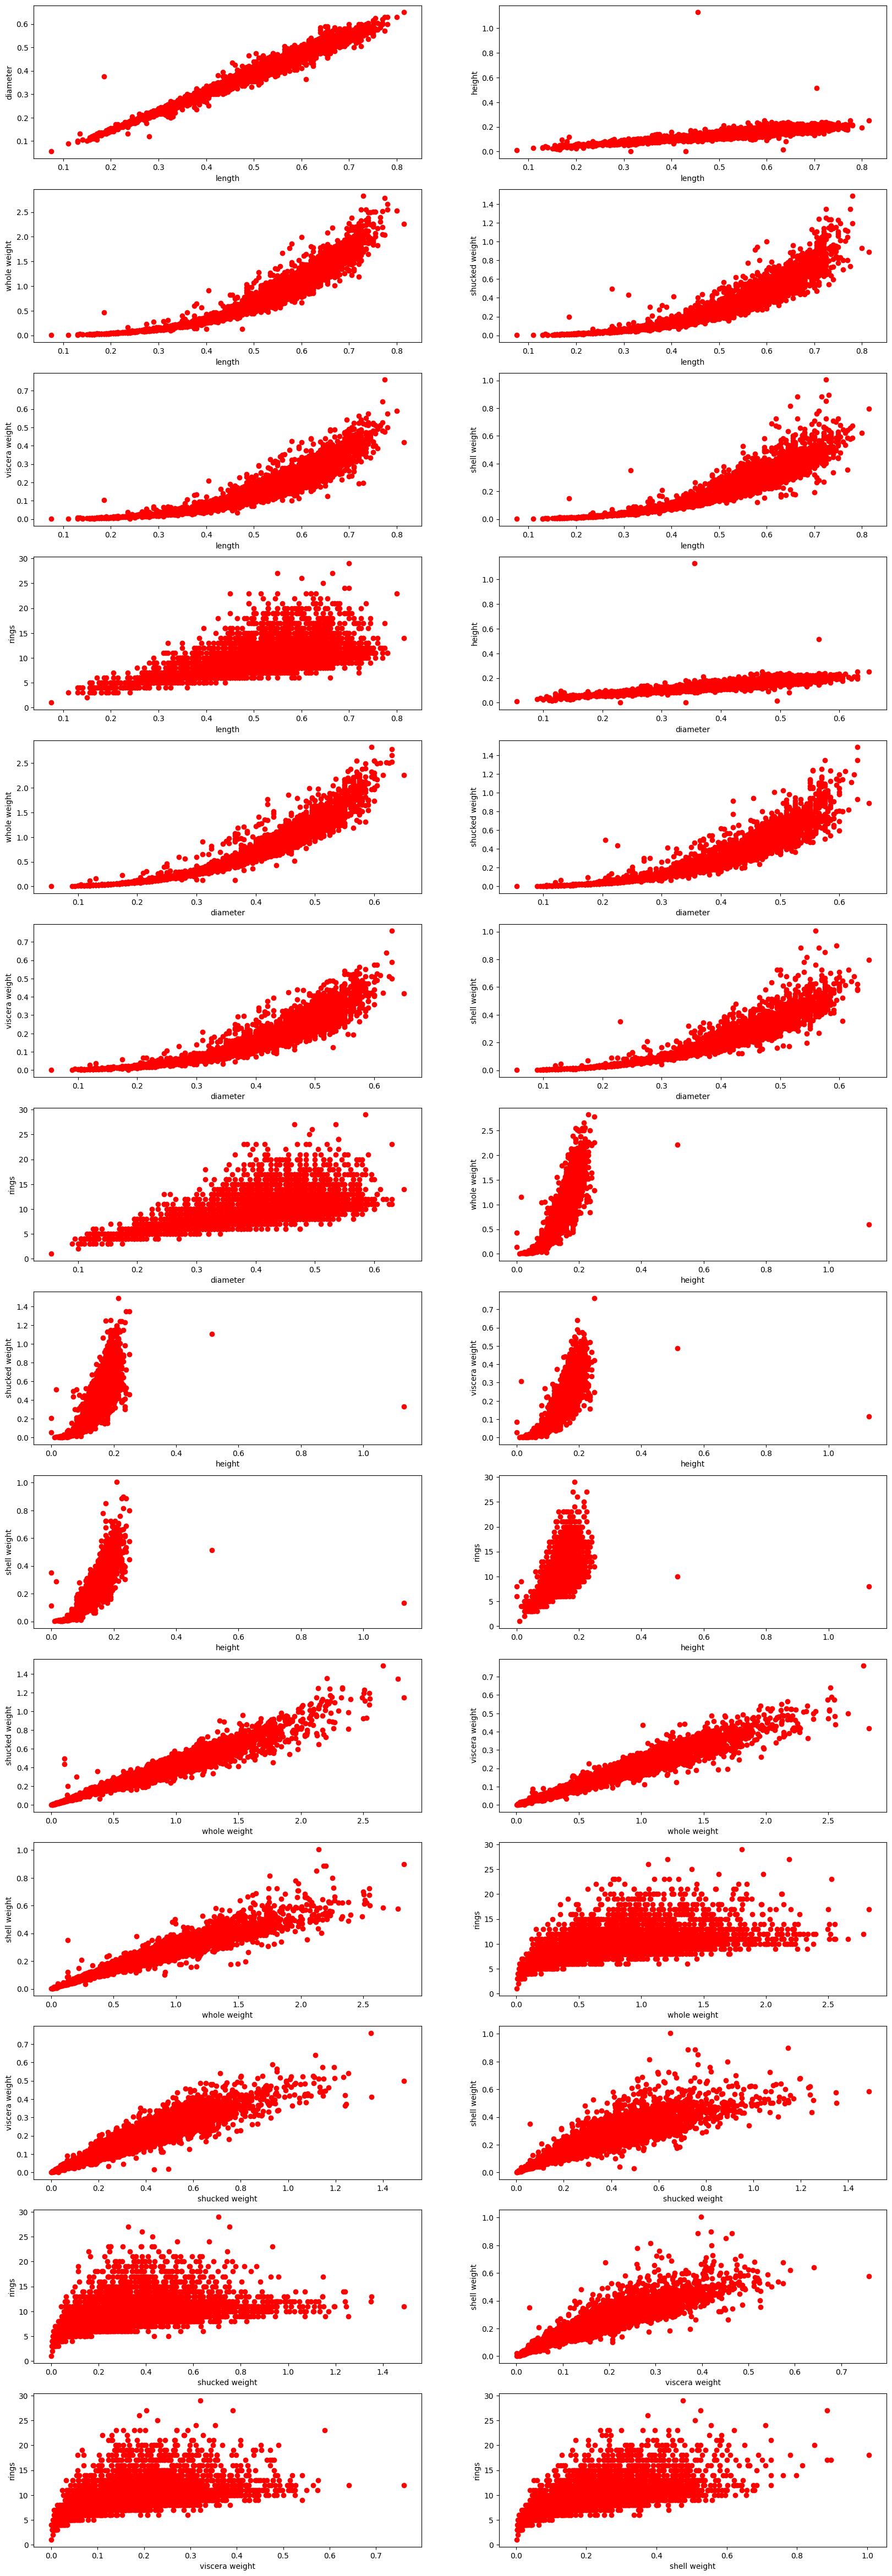

In [5]:
axes = []

#axes.append(dataFrame.plot.scatter(x="length", y="diameter", c="blue"))

startColumn = 0
endColumn = len(columns) - 1

#print(dataFrame.index(0))
fig, ax = plt.subplots(14, 2, figsize=(20, 60))

startAxisX = 0
startAxisY = 0
for currStartColumn in range(startColumn, endColumn):
    for currColumnNumber in range(currStartColumn + 1, len(columns)):
        currStartColumnName = columns[currStartColumn]
        currColumnNumberName = columns[currColumnNumber]
        print("Column number: " + str(currColumnNumberName))
        print("Start column: " + str(currStartColumnName))
        print()
        ax[startAxisX, startAxisY].scatter(x=dataFrame[currStartColumnName], y=dataFrame[currColumnNumberName], c="red")
        ax[startAxisX, startAxisY].set_xlabel(currStartColumnName)
        ax[startAxisX, startAxisY].set_ylabel(currColumnNumberName)
        startAxisY += 1
        if startAxisY == 2:
            startAxisY = 0
            startAxisX += 1

plt.show()
    #for columnNumber in range(currStartColumn, len(columns) - 1):
    #    axes.append(dataFrame.plot.scatter(x=columns[currStartColumn], y=columns[currStartColumn + 1], c="red"))

#display(axes)

In [6]:
# default method - Pearson's Correlation
dataFrame = dataFrame.drop("sex", axis=1)
correlation = dataFrame.corr()
display(correlation)

length  diameter    height  whole weight  shucked weight  \
length          1.000000  0.986812  0.827554      0.925261        0.897914   
diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
height          0.827554  0.833684  1.000000      0.819221        0.774972   
whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                viscera weight  shell weight     rings  
length                0.903018      0.897706  0.556720  
diameter              0.899724      0.905330  0.574660  
height                0.798319      0.817338  0.557467  
whole weight          0.966375      0.955355  0.540390  
shucked weight        0.931961      0.882617  0.420884  
viscera weight        1.000000      0.907656  0.503819  
shell weight          0.907656      1.000000  0.627574  
rings                 0.503819      0.627574  1.000000

Text(0.5, 1.0, 'Linear correlation matrix')

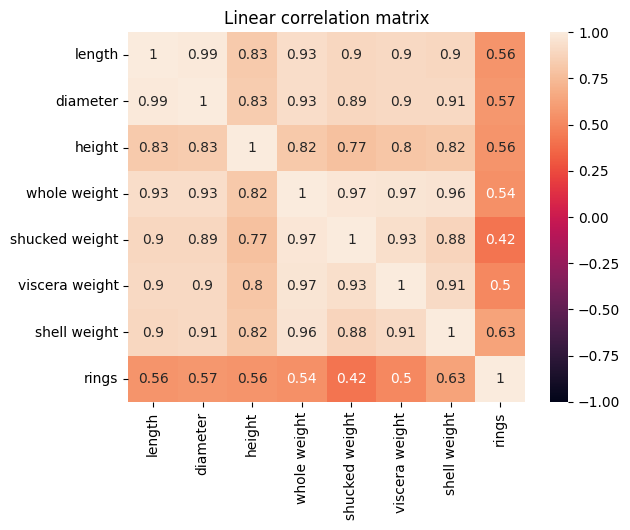

In [7]:
correlationHeatmap = sb.heatmap(correlation, vmin=-1, vmax=1, annot=True)
correlationHeatmap.set_title("Linear correlation matrix")


<Axes: xlabel='length', ylabel='diameter'>

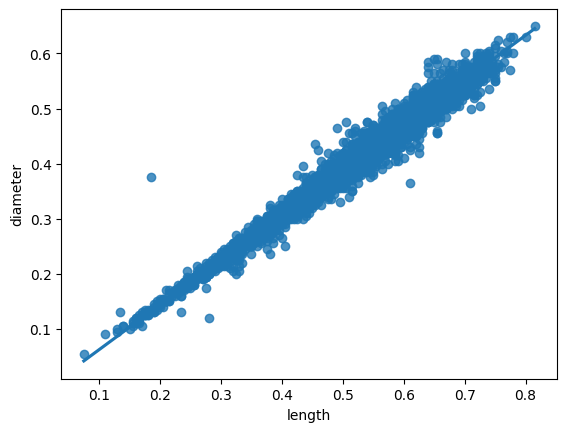

In [8]:
#length, diameter have the strongest correlation - hardcoded

sb.regplot(dataFrame, x="length", y="diameter")

In [9]:
import pandas as pd

# Wczytanie danych z pliku CSV
dataFrame = pd.read_csv("data.csv", names=("sex", "length", "diameter", "height", "whole weight",
                        "shucked weight", "viscera weight", "shell weight", "rings"))

# Definicje płci i cech
sex_categories = ["M", "F", "I"]
sex_labels = ["Male", "Female", "Infant"]
columns = dataFrame.columns[1:9]  # Kolumny cech ilościowych

# Lista do przechowywania wyników
summary_list = []

# Obliczanie statystyk dla każdej płci i każdej cechy
for sex, label in zip(sex_categories, sex_labels):
    filtered_df = dataFrame[dataFrame['sex'] == sex]
    
    # Iteracja po każdej kolumnie cechy
    for column in columns:
        stats = {
            "Feature": column,
            "Sex": label,
            "mean": filtered_df[column].mean(),
            "std": filtered_df[column].std(),
            "min": filtered_df[column].min(),
            "25%": filtered_df[column].quantile(0.25),
            "50%": filtered_df[column].median(),
            "75%": filtered_df[column].quantile(0.75),
            "max": filtered_df[column].max()
        }
        summary_list.append(stats)

# Tworzenie DataFrame z wyników
# 
summary_df = pd.DataFrame(summary_list)

# Ustawienie MultiIndexu na kolumnach Feature i Sex
summary_df.set_index(["Feature", "Sex"], inplace=True)

# Wyświetlenie wynikowej tabeli
display(summary_df.sort_index(level="Feature"))


mean       std     min       25%       50%  \
Feature        Sex                                                       
diameter       Female   0.454732  0.070954  0.1950  0.410000   0.46500   
               Infant   0.326494  0.088109  0.0550  0.270000   0.33500   
               Male     0.439287  0.084398  0.1100  0.395000   0.45500   
height         Female   0.158011  0.039984  0.0150  0.140000   0.16000   
               Infant   0.107996  0.031995  0.0000  0.085000   0.11000   
               Male     0.151381  0.034804  0.0250  0.130000   0.15500   
length         Female   0.579093  0.086160  0.2750  0.525000   0.59000   
               Infant   0.427746  0.108858  0.0750  0.360000   0.43500   
               Male     0.561391  0.102697  0.1550  0.505000   0.58000   
rings          Female  11.129304  3.104256  5.0000  9.000000  10.00000   
               Infant   7.890462  2.511554  1.0000  6.000000   8.00000   
               Male    10.705497  3.026349  3.0000  9.000000  10.00000   
shell weight   Female   0.302010  0.125649  0.0250  0.213250   0.29500   
               Infant   0.128182  0.084927  0.0015  0.064125   0.11300   
               Male     0.281969  0.130834  0.0050  0.190000   0.27600   
shucked weight Female   0.446188  0.198663  0.0310  0.295000   0.44050   
               Infant   0.191035  0.128405  0.0010  0.090000   0.16975   
               Male     0.432946  0.223000  0.0065  0.276375   0.42175   
viscera weight Female   0.230689  0.097617  0.0210  0.159000   0.22400   
               Infant   0.092010  0.062536  0.0005  0.042500   0.08050   
               Male     0.215545  0.104919  0.0030  0.145875   0.21000   
whole weight   Female   1.046532  0.430316  0.0800  0.730000   1.03850   
               Infant   0.431363  0.286275  0.0020  0.205500   0.38400   
               Male     0.991459  0.470581  0.0155  0.671625   0.97575   

                             75%      max  
Feature        Sex                         
diameter       Female   0.505000   0.6500  
               Infant   0.390000   0.5500  
               Male     0.500000   0.6300  
height         Female   0.175000   1.1300  
               Infant   0.130000   0.2200  
               Male     0.175000   0.5150  
length         Female   0.640000   0.8150  
               Infant   0.510000   0.7250  
               Male     0.630000   0.7800  
rings          Female  12.000000  29.0000  
               Infant   9.000000  21.0000  
               Male    12.000000  27.0000  
shell weight   Female   0.375000   1.0050  
               Infant   0.178500   0.6550  
               Male     0.355500   0.8970  
shucked weight Female   0.573250   1.4880  
               Infant   0.270375   0.7735  
               Male     0.566000   1.3510  
viscera weight Female   0.297250   0.5900  
               Infant   0.130000   0.4405  
               Male     0.278000   0.7600  
whole weight   Female   1.320250   2.6570  
               Infant   0.599375   2.0495  
               Male     1.265625   2.8255

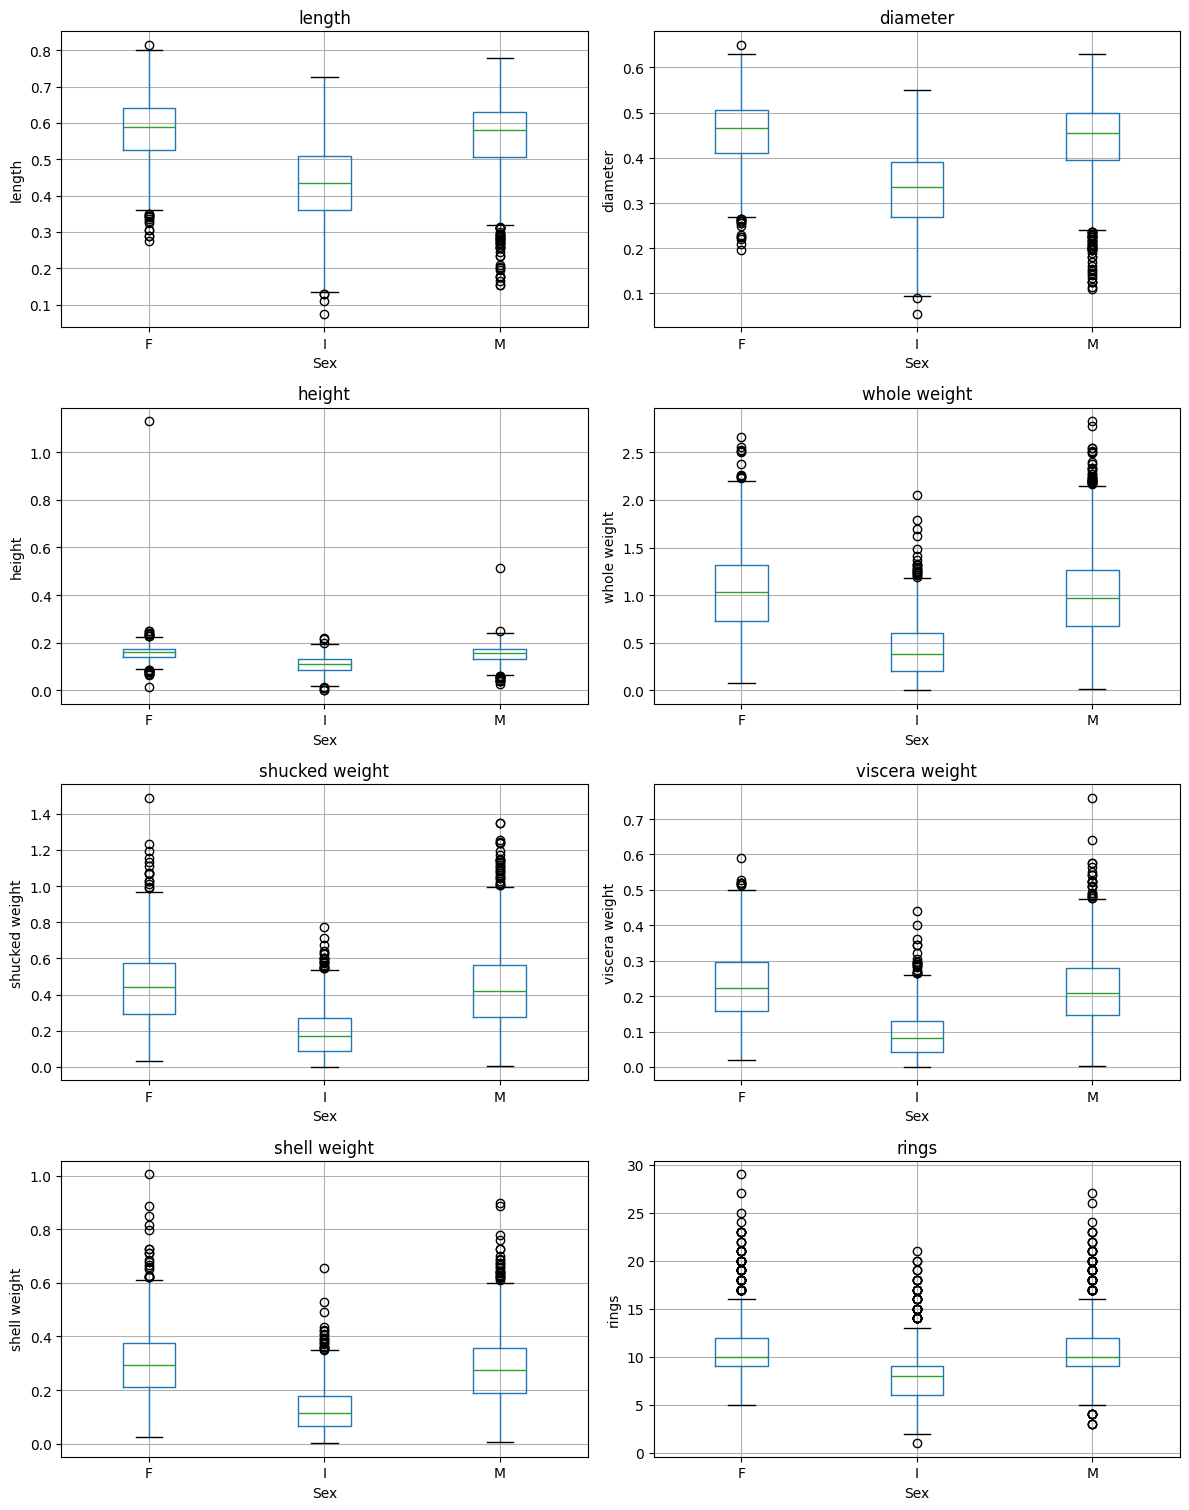

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z pliku CSV
dataFrame = pd.read_csv("data.csv", names=("sex", "length", "diameter", "height", "whole weight",
                                           "shucked weight", "viscera weight", "shell weight", "rings"))

# Lista kolumn ilościowych do wykresów
quantitative_columns = dataFrame.columns[1:9]

# Tworzenie figury z 4 wierszami i 2 kolumnami dla wykresów pudełkowych
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
fig.suptitle("Boxplots of Quantitative Variables Grouped by Sex", fontsize=16)

# Spłaszczamy tablicę osi, aby łatwiej iterować przez każdą z nich
axes = axes.flatten()

# Tworzenie wykresów pudełkowych dla każdej ilościowej zmiennej
for i, column in enumerate(quantitative_columns):
    # Rysowanie wykresu pudełkowego dla danej kolumny, grupując według 'sex'
    dataFrame.boxplot(column=column, by='sex', ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel("Sex")
    axes[i].set_ylabel(column)



# Usuwanie tytułu generowanego automatycznie przez `boxplot`
plt.suptitle("")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Dostosowanie layoutu

# Wyświetlanie wykresów
plt.show()
